In [1]:
import sys
sys.path.append('../../RNN')
from Common import *

import matplotlib.pyplot as plt

import experiment as exp

# Training

Here I train a RNN with a single hidden node on a scalar time-series. The model is trained to predict value $x^t$ on the basis of all previous timepoints $x^{0\dots t-1}$. The data is a simple sine wave. 

Hyperparameters:
- **numT**: number of time steps in the time series
- **numN**: number of epochs
- **alpha**: learning rate of all parameters except $v$
- **v0**: initial parameter value of $v$
- **alpha_v**: learning rate for $v$
- **feedback_epoch**: provide feedback after so many epochs, or _None_

In [2]:
cfg0 = Empty()
cfg0.numT = 100
cfg0.numN = 5000
cfg0.alpha = 1
cfg0.v0 = np.random.randn(1)
cfg0.alpha_v = cfg0.alpha
cfg0.feedback_epoch = 100

data = np.sin(np.arange(0, cfg0.numT+1)*(2*np.pi*11)/(cfg0.numT+1))
x = data[0:-1]
y = data[1:]

log = exp.run(cfg0, x, y)   

Finished 0/5000
Finished 100/5000
Finished 200/5000
Finished 300/5000
Finished 400/5000
Finished 500/5000
Finished 600/5000
Finished 700/5000
Finished 800/5000
Finished 900/5000
Finished 1000/5000
Finished 1100/5000
Finished 1200/5000
Finished 1300/5000
Finished 1400/5000
Finished 1500/5000
Finished 1600/5000
Finished 1700/5000
Finished 1800/5000
Finished 1900/5000
Finished 2000/5000
Finished 2100/5000
Finished 2200/5000
Finished 2300/5000
Finished 2400/5000
Finished 2500/5000
Finished 2600/5000
Finished 2700/5000
Finished 2800/5000
Finished 2900/5000
Finished 3000/5000
Finished 3100/5000
Finished 3200/5000
Finished 3300/5000
Finished 3400/5000
Finished 3500/5000
Finished 3600/5000
Finished 3700/5000
Finished 3800/5000
Finished 3900/5000
Finished 4000/5000
Finished 4100/5000
Finished 4200/5000
Finished 4300/5000
Finished 4400/5000
Finished 4500/5000
Finished 4600/5000
Finished 4700/5000
Finished 4800/5000
Finished 4900/5000


## Mean squared error

Text(0, 0.5, 'Mean squared error')

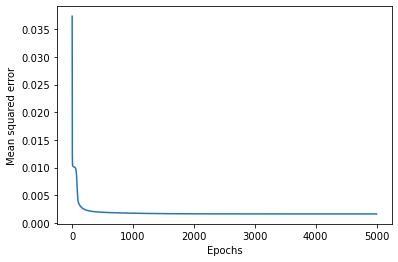

In [3]:
plt.figure()
plt.plot(log.mse)
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")

## Predicted data $\hat{y}$ and training data $x$ over time
From the final epoch

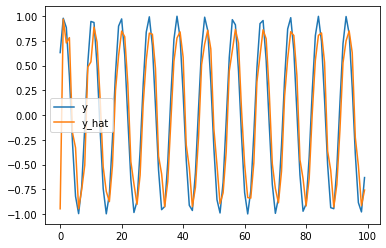

In [4]:
plt.figure()
plt.plot(y)
plt.plot(log.y_hat[cfg0.numN-1])
plt.legend(['y','y_hat'])

## Evolution of parameters

Text(0.5, 0, 'Epochs')

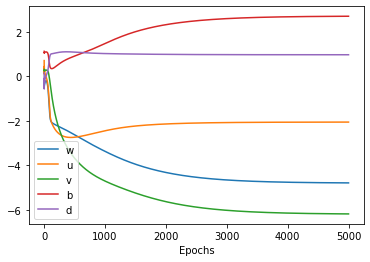

In [5]:
plt.figure()
plt.plot(log.w)
plt.plot(log.u)
plt.plot(log.v)
plt.plot(log.b)
plt.plot(log.d)
plt.legend(['w', 'u', 'v', 'b', 'd'])    
plt.xlabel("Epochs")

## Predicted data $\hat{y}$ and training data $x$ scatter plot
If the model's prediction is indeed influenced by its internal state, then for a given $x$ it should be able to output more than one prediction $\hat{y}$.

This is indeed the case:

Text(0, 0.5, '$\\hat{y}$')

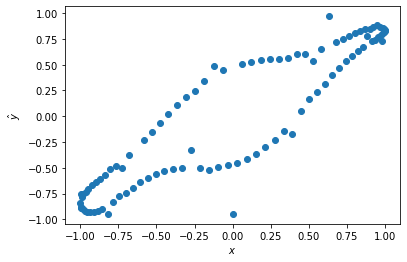

In [6]:
plt.figure()
plt.scatter(x, log.y_hat[cfg0.numN-1])
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")